## Regressão logística utilizando Sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Base de dados :

In [2]:
data = pd.read_csv('iris.csv', header = None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Transformação das classes :

In [3]:
data = data[:100]
data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data.rename(columns={ 0 :'Sepal Length', 1 :'Sepal Width', 2 :'Petal Length', 3 :'Petal Width', 4 :'Class'},
            inplace=True)
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Análise exploratória da base de dados :

In [11]:
sns.set_palette("Greys_r")
sns.set_style('whitegrid')

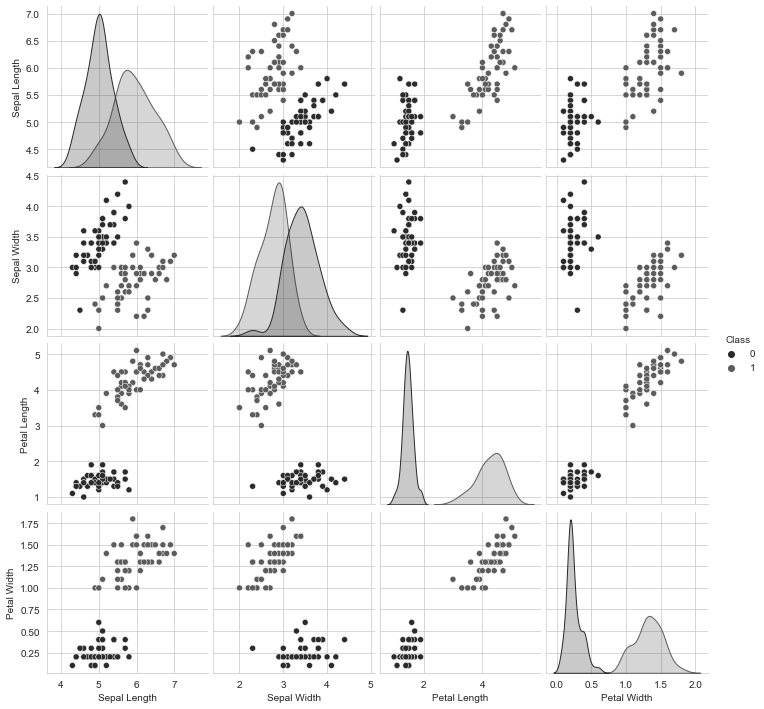

In [12]:
sns.pairplot(data, hue = 'Class')

## Dados para aprendizagem e teste do modelo :

In [13]:
y = data['Class'] #target

X = data[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']] #features

In [21]:
X.shape

(100, 4)

## Uso da classe train_test_split para dividir a base de dados em aprendizagem e teste :

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
X_train.shape

(70, 4)

In [27]:
X_test.shape

(30, 4)

## Aprendizagem do modelo :

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()

In [30]:
lr.fit(X_train,y_train)

LogisticRegression()

## Coeficientes 'w' do modelo :

In [31]:
print('Coeficientes: \n', lr.coef_)
print('Bias: \n', lr.intercept_)

Coeficientes: 
 [[ 0.40726994 -0.88879102  2.11933088  0.9105837 ]]
Bias: 
 [-5.91001632]


## Estimando valores da variável objetivo 'y' :

In [50]:
predictions = lr.predict(X_test)
predictions[29]

1

In [49]:
probability = lr.predict_proba(X_test)
probability[29]

array([0.00716258, 0.99283742])

In [51]:
probability_log = lr.predict_log_proba(X_test)
probability_log[29]

array([-4.93888485, -0.00718836])

Text(0, 0.5, 'Y estimado')

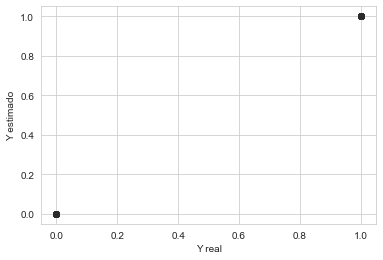

In [52]:
plt.scatter(y_test,predictions)
plt.xlabel('Y real')
plt.ylabel('Y estimado')

## Métricas para validação do modelo :

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

